### 指定数据

此模块有3个需要自己定义的参数

1. `mydir`: 数据存放的路径。
2. `labelf`: 每个样本的标注信息文件。
3. `labels`: 要让AI系统学习的目标，例如肿瘤的良恶性、T-stage等。

In [93]:
import os
import pandas as pd
from IPython.display import display
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
from onekey_algo import OnekeyDS as okds
from onekey_algo import get_param_in_cwd

os.makedirs('img', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('features', exist_ok=True)

# 设置任务Task前缀
task_type = 'Path_'
# 设置数据目录
# mydir = r'你自己数据的路径'
mydir = get_param_in_cwd('radio_dir')
if mydir == okds.ct:
    print(f'正在使用Onekey数据：{okds.ct}，如果不符合预期，请修改目录位置！')
# 对应的标签文件
group_info = get_param_in_cwd('dataset_column') or 'group'
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
# 读取标签数据列名
labels = [get_param_in_cwd('task_column') or 'label']

In [1]:
from collections import namedtuple
import onekey_algo.custom.components as okcomp
from onekey_algo import OnekeyDS as okds
from onekey_algo.custom.utils import print_join_info
from onekey_algo import get_param_in_cwd

import pandas as pd
import numpy as np
import os
os.makedirs('img', exist_ok=True)
os.makedirs('features', exist_ok=True)


prob_histo = pd.read_csv('features/path_prob_histogram220.csv')
prob_tfidf = pd.read_csv('features/path_prob_tfidf220.csv')
prob = pd.merge(prob_histo, prob_tfidf, on='ID', how='inner', suffixes=['_histo', '_tfidf'])
prob['ID'] = prob['ID'].map(lambda x: x.split('-')[0])

pred_histo = pd.read_csv('features/path_pred_histogram220.csv')
pred_tfidf = pd.read_csv('features/path_pred_tfidf220.csv')
pred = pd.merge(pred_histo, pred_tfidf, on='ID', how='inner', suffixes=['_histo', '_tfidf'])
pred['ID'] = pred['ID'].map(lambda x: x.split('-')[0])

rad_data = pd.merge(prob, pred, on='ID', how='inner')
rad_data.to_csv('features/path_features220.csv', index=False, header=True)
labels = ['label']
featrues_not_use = ['ID']
rad_data

,ID,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,...,prob095,prob096,prob097,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1
0,1240023,0.0,0.000e+00,0.000,0.000,3.349e-04,3.349e-04,6.698e-04,3.349e-04,2.009e-03,...,0.000,0.000,0.000,0.000,0.000,0.000,0.780,0.220,0.963,0.271
1,1310929,0.0,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,4.067e-04,...,0.082,0.081,0.043,0.037,0.005,0.000,0.080,0.920,0.086,0.996
2,1320927,0.0,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,3.171e-04,...,0.268,0.298,0.328,0.303,0.163,0.082,0.044,0.956,0.046,0.999
3,1325512,0.0,6.252e-04,0.001,0.002,6.252e-03,6.565e-03,7.502e-03,5.314e-03,5.939e-03,...,0.006,0.009,0.003,0.000,0.000,0.000,0.584,0.416,0.814,0.580
4,1332330,0.0,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,4.166e-04,...,0.004,0.004,0.000,0.000,0.000,0.000,0.417,0.583,0.582,0.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2309947C4,0.0,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.101,0.124,0.188,0.314,0.652,0.489,0.250,0.750,0.317,0.948
1006,2310250C4,0.0,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.186,0.249,0.317,0.413,0.438,0.050,0.692,0.308,0.914,0.406
1007,2311069C2,0.0,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.151,0.186,0.188,0.237,0.427,0.193,0.353,0.647,0.479,0.878
1008,2311340C2,0.0,0.000e+00,0.000,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.218,0.237,0.217,0.181,0.089,0.004,0.602,0.398,0.835,0.551


## 标注数据

数据以csv格式进行存储，这里如果是其他格式，可以使用自定义函数读取出每个样本的结果。

要求label_data为一个`DataFrame`格式，包括ID列以及后续的labels列，可以是多列，支持Multi-Task。

In [252]:
import random
def rand2train():
    if random.randint(0, 100) < 60:
        return 'train'
    else:
        return 'test'

In [253]:
from onekey_algo.custom.components.comp1 import fillna
label_data = pd.read_csv(get_param_in_cwd('survival_file'), dtype={'ID': str})
group_info = pd.read_csv('data/label-RND-0.csv', dtype={'ID': str})[['ID', 'group']]
label_data = pd.merge(label_data, group_info, on='ID', how='left')
label_data['group'] = label_data['group'].map(lambda x: x if not pd.isna(x) else rand2train())
label_data.to_csv('data/group.csv', index=False)
# label_data['group'] = label_data['group'].map(lambda x: x if not pd.isna(x) else 'test')
print(label_data['group'].value_counts())
label_data

train    585
test     300
Name: group, dtype: int64


,ID,OSTime,OS,group
0,1238060,4.50,0,train
1,1240023,28.47,0,train
2,1310929,5.73,1,test
3,1317999,21.27,0,test
4,1320927,7.30,1,test
...,...,...,...,...
880,2017435,39.57,0,test
881,2018527,5.07,0,train
882,2018539,16.73,1,train
883,2018734,10.93,1,test


## 特征拼接 

将标注数据`label_data`与`rad_data`进行合并，得到训练数据。

**注意：** 
1. 需要删掉ID这一列
2. 如果发现数据少了，需要自行检查数据是否匹配。

In [254]:
event_col = get_param_in_cwd('event_col', 'label')
duration_col=get_param_in_cwd('duration_col', 'time')

combined_data = pd.merge(rad_data, label_data, on=['ID'], how='inner')
print(combined_data[event_col].value_counts())
combined_data

1    628
0    260
Name: OS, dtype: int64


,ID,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,...,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1,OSTime,OS,group
0,1238060,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.011,0.006,0.000,0.020,0.980,0.020,1.000,4.50,0,train
1,1240023,0.0,0.0,0.0,0.0,3.349e-04,3.349e-04,6.698e-04,3.349e-04,2.009e-03,...,0.000,0.000,0.000,0.780,0.220,0.963,0.270,28.47,0,train
2,1310929,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,4.067e-04,...,0.036,0.005,0.000,0.080,0.920,0.087,0.996,5.73,1,test
3,1317999,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.057,0.036,0.000,0.053,0.947,0.056,0.998,21.27,0,test
4,1320927,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,3.171e-04,...,0.297,0.165,0.084,0.044,0.956,0.046,0.999,7.30,1,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2017433,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.193,0.071,0.014,0.026,0.974,0.027,1.000,22.23,1,test
884,2017435,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.006,0.000,0.000,0.112,0.888,0.125,0.992,39.57,0,test
885,2018527,0.0,0.0,0.0,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,...,0.029,0.004,0.006,0.089,0.911,0.098,0.995,5.07,0,train
886,2018539,0.0,0.0,0.0,0.0,2.644e-04,1.322e-04,0.000e+00,1.322e-04,5.288e-04,...,0.007,0.004,0.000,0.526,0.474,0.744,0.669,16.73,1,train


## 正则化

`normalize_df` 为onekey中正则化的API，将数据变化到0均值1方差。正则化的方法为

$column = \frac{column - mean}{std}$

In [255]:
from onekey_algo.custom.components.comp1 import normalize_df
data = normalize_df(combined_data, not_norm=['ID', event_col, duration_col], group='group', use_train=True)
data = data.dropna(axis=1)
data.describe()

[2024-03-24 21:01:13 - comp1.py: 186]	INFO	正在使用训练集预定数据进行标准化。


,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,prob-0.09,...,prob097,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1,OSTime,OS
count,888.000,888.000,888.000,888.000,888.000,888.000,888.000,888.000,888.000,888.000,...,888.000,888.000,888.000,888.000,888.000,888.000,888.000,888.000,888.000,888.000
mean,-0.024,-0.032,-0.039,-0.050,-0.064,-0.072,-0.084,-0.102,-0.118,-0.126,...,0.655,0.677,0.466,0.371,-0.646,0.646,-0.661,0.415,25.912,0.707
std,0.812,0.813,0.814,0.815,0.817,0.818,0.822,0.826,0.834,0.834,...,1.576,1.870,1.758,1.963,1.220,1.220,1.233,0.996,19.798,0.455
min,-0.071,-0.094,-0.119,-0.155,-0.197,-0.223,-0.267,-0.321,-0.377,-0.397,...,-0.326,-0.287,-0.214,-0.152,-2.141,-2.307,-2.137,-3.009,0.700,0.000
25%,-0.071,-0.094,-0.119,-0.155,-0.197,-0.223,-0.267,-0.321,-0.377,-0.397,...,-0.326,-0.287,-0.214,-0.152,-1.914,-0.367,-1.962,-0.164,10.400,0.000
50%,-0.071,-0.094,-0.119,-0.155,-0.197,-0.223,-0.267,-0.321,-0.377,-0.397,...,-0.239,-0.236,-0.214,-0.152,-0.641,0.641,-0.691,0.850,20.050,1.000
75%,-0.071,-0.094,-0.119,-0.155,-0.197,-0.223,-0.267,-0.205,-0.203,-0.214,...,1.086,0.585,0.030,-0.152,0.367,1.914,0.474,1.227,36.358,1.000
max,21.806,17.912,15.675,15.296,15.070,15.075,14.291,11.700,10.246,11.054,...,9.416,9.222,13.297,25.213,2.307,2.141,1.580,1.233,102.500,1.000


In [256]:
from onekey_algo.custom.components.comp1 import normalize_df, select_feature

corr_name = get_param_in_cwd('corr_name', 'pearson')
if os.path.exists(f'features/{task_type}_features_sel.csv') and False:
    data = pd.read_csv(f'features/{task_type}_features_sel.csv', header=0)
else:
    sel_feature = select_feature(data[[c for c in data.columns if c not in [event_col, duration_col]]].corr(corr_name), 
                                 threshold=0.9, topn=10, verbose=False)
    data = data[['ID'] + sel_feature + [event_col, duration_col, 'group']]
    data.to_csv(f'features/{task_type}_features_sel.csv', header=True, index=False)
data

,ID,prob00,prob002,prob008,prob009,prob01,prob015,prob016,prob017,prob02,...,prob067,prob072,prob075,prob098,prob099,prob10,pred1,OS,OSTime,group
2,1310929,-0.082,-0.148,-0.098,-0.447,-0.490,-0.685,-0.501,-0.741,-0.720,...,2.231,3.414,1.533,0.436,-0.113,-0.152,1.214,1,5.73,test
3,1317999,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,2.395,1.731,1.638,0.865,0.565,-0.152,1.225,0,21.27,test
4,1320927,-0.082,-0.148,-0.193,-0.447,-0.490,-0.543,-0.676,-0.506,-0.760,...,1.586,1.392,0.511,5.709,3.337,3.952,1.228,1,7.30,test
9,1421838,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,1.317,2.559,2.189,1.986,0.975,-0.152,1.230,0,9.93,test
10,1425167,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,1.022,1.544,2.314,1.822,0.945,-0.152,1.229,0,6.00,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,2016764,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,3.519,3.189,2.442,-0.056,-0.142,-0.152,1.231,0,13.30,train
880,2017021,-0.082,-0.148,-0.417,-0.337,-0.490,-0.611,-0.354,-0.557,-0.404,...,-0.060,-0.100,-0.201,-0.199,-0.177,-0.152,0.141,1,2.00,train
881,2017217,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,0.641,1.933,1.936,3.552,2.810,1.580,1.233,0,10.77,train
885,2018527,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,2.498,1.187,1.989,0.306,-0.121,0.131,1.209,0,5.07,train


## 构建数据

将样本的训练数据X与监督信息y分离出来，并且对训练数据进行划分，一般的划分原则为80%-20%

In [336]:
import numpy as np
import onekey_algo.custom.components as okcomp
from collections import OrderedDict

group_info = get_param_in_cwd('group_info', 'group')
train_data = data[(data[group_info] == 'train')]

# subsets = [s for s in label_data['group'].value_counts().index if s != 'train']
subsets = ['train', 'test']
val_datasets = OrderedDict()
for subset in subsets:
    val_data = data[data[group_info] == subset]
    val_datasets[subset] = val_data
    val_data.to_csv(f'features/{task_type}_{subset}_features_norm.csv', index=False)

print('，'.join([f"{subset}样本数：{d_.shape}" for subset, d_ in val_datasets.items()]))

train样本数：(585, 31)，test样本数：(303, 31)


### Lasso -COX

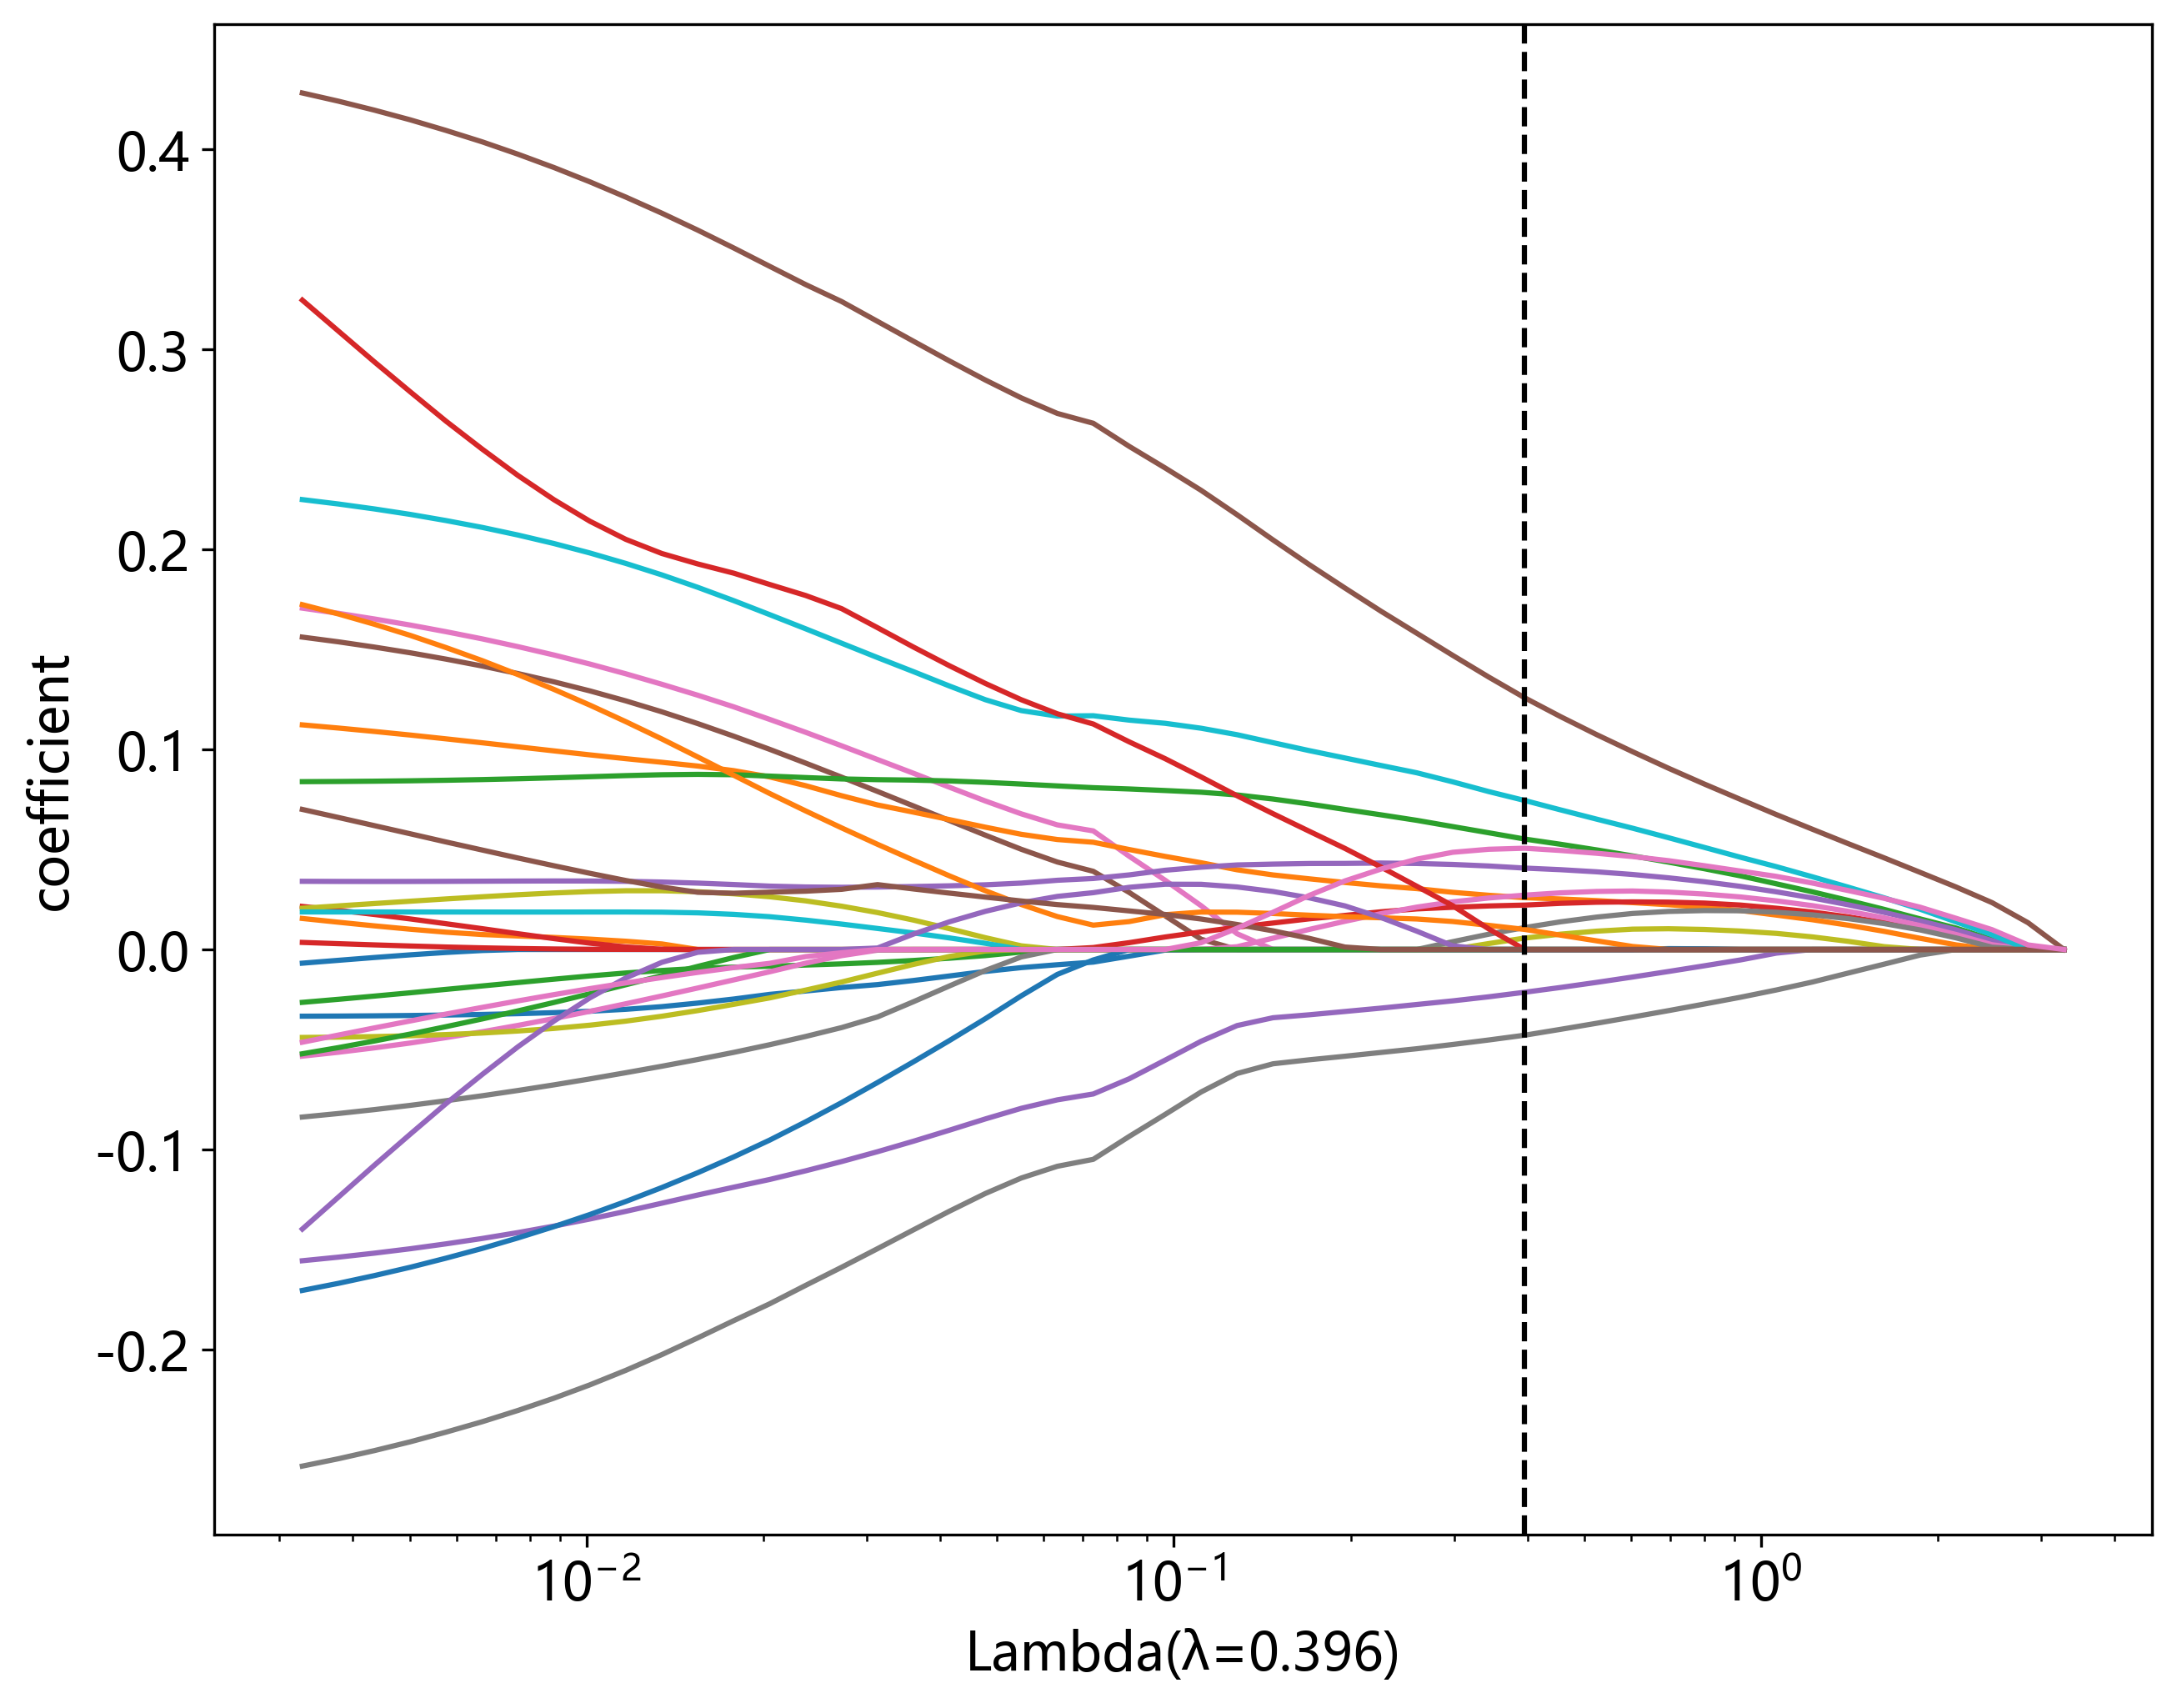

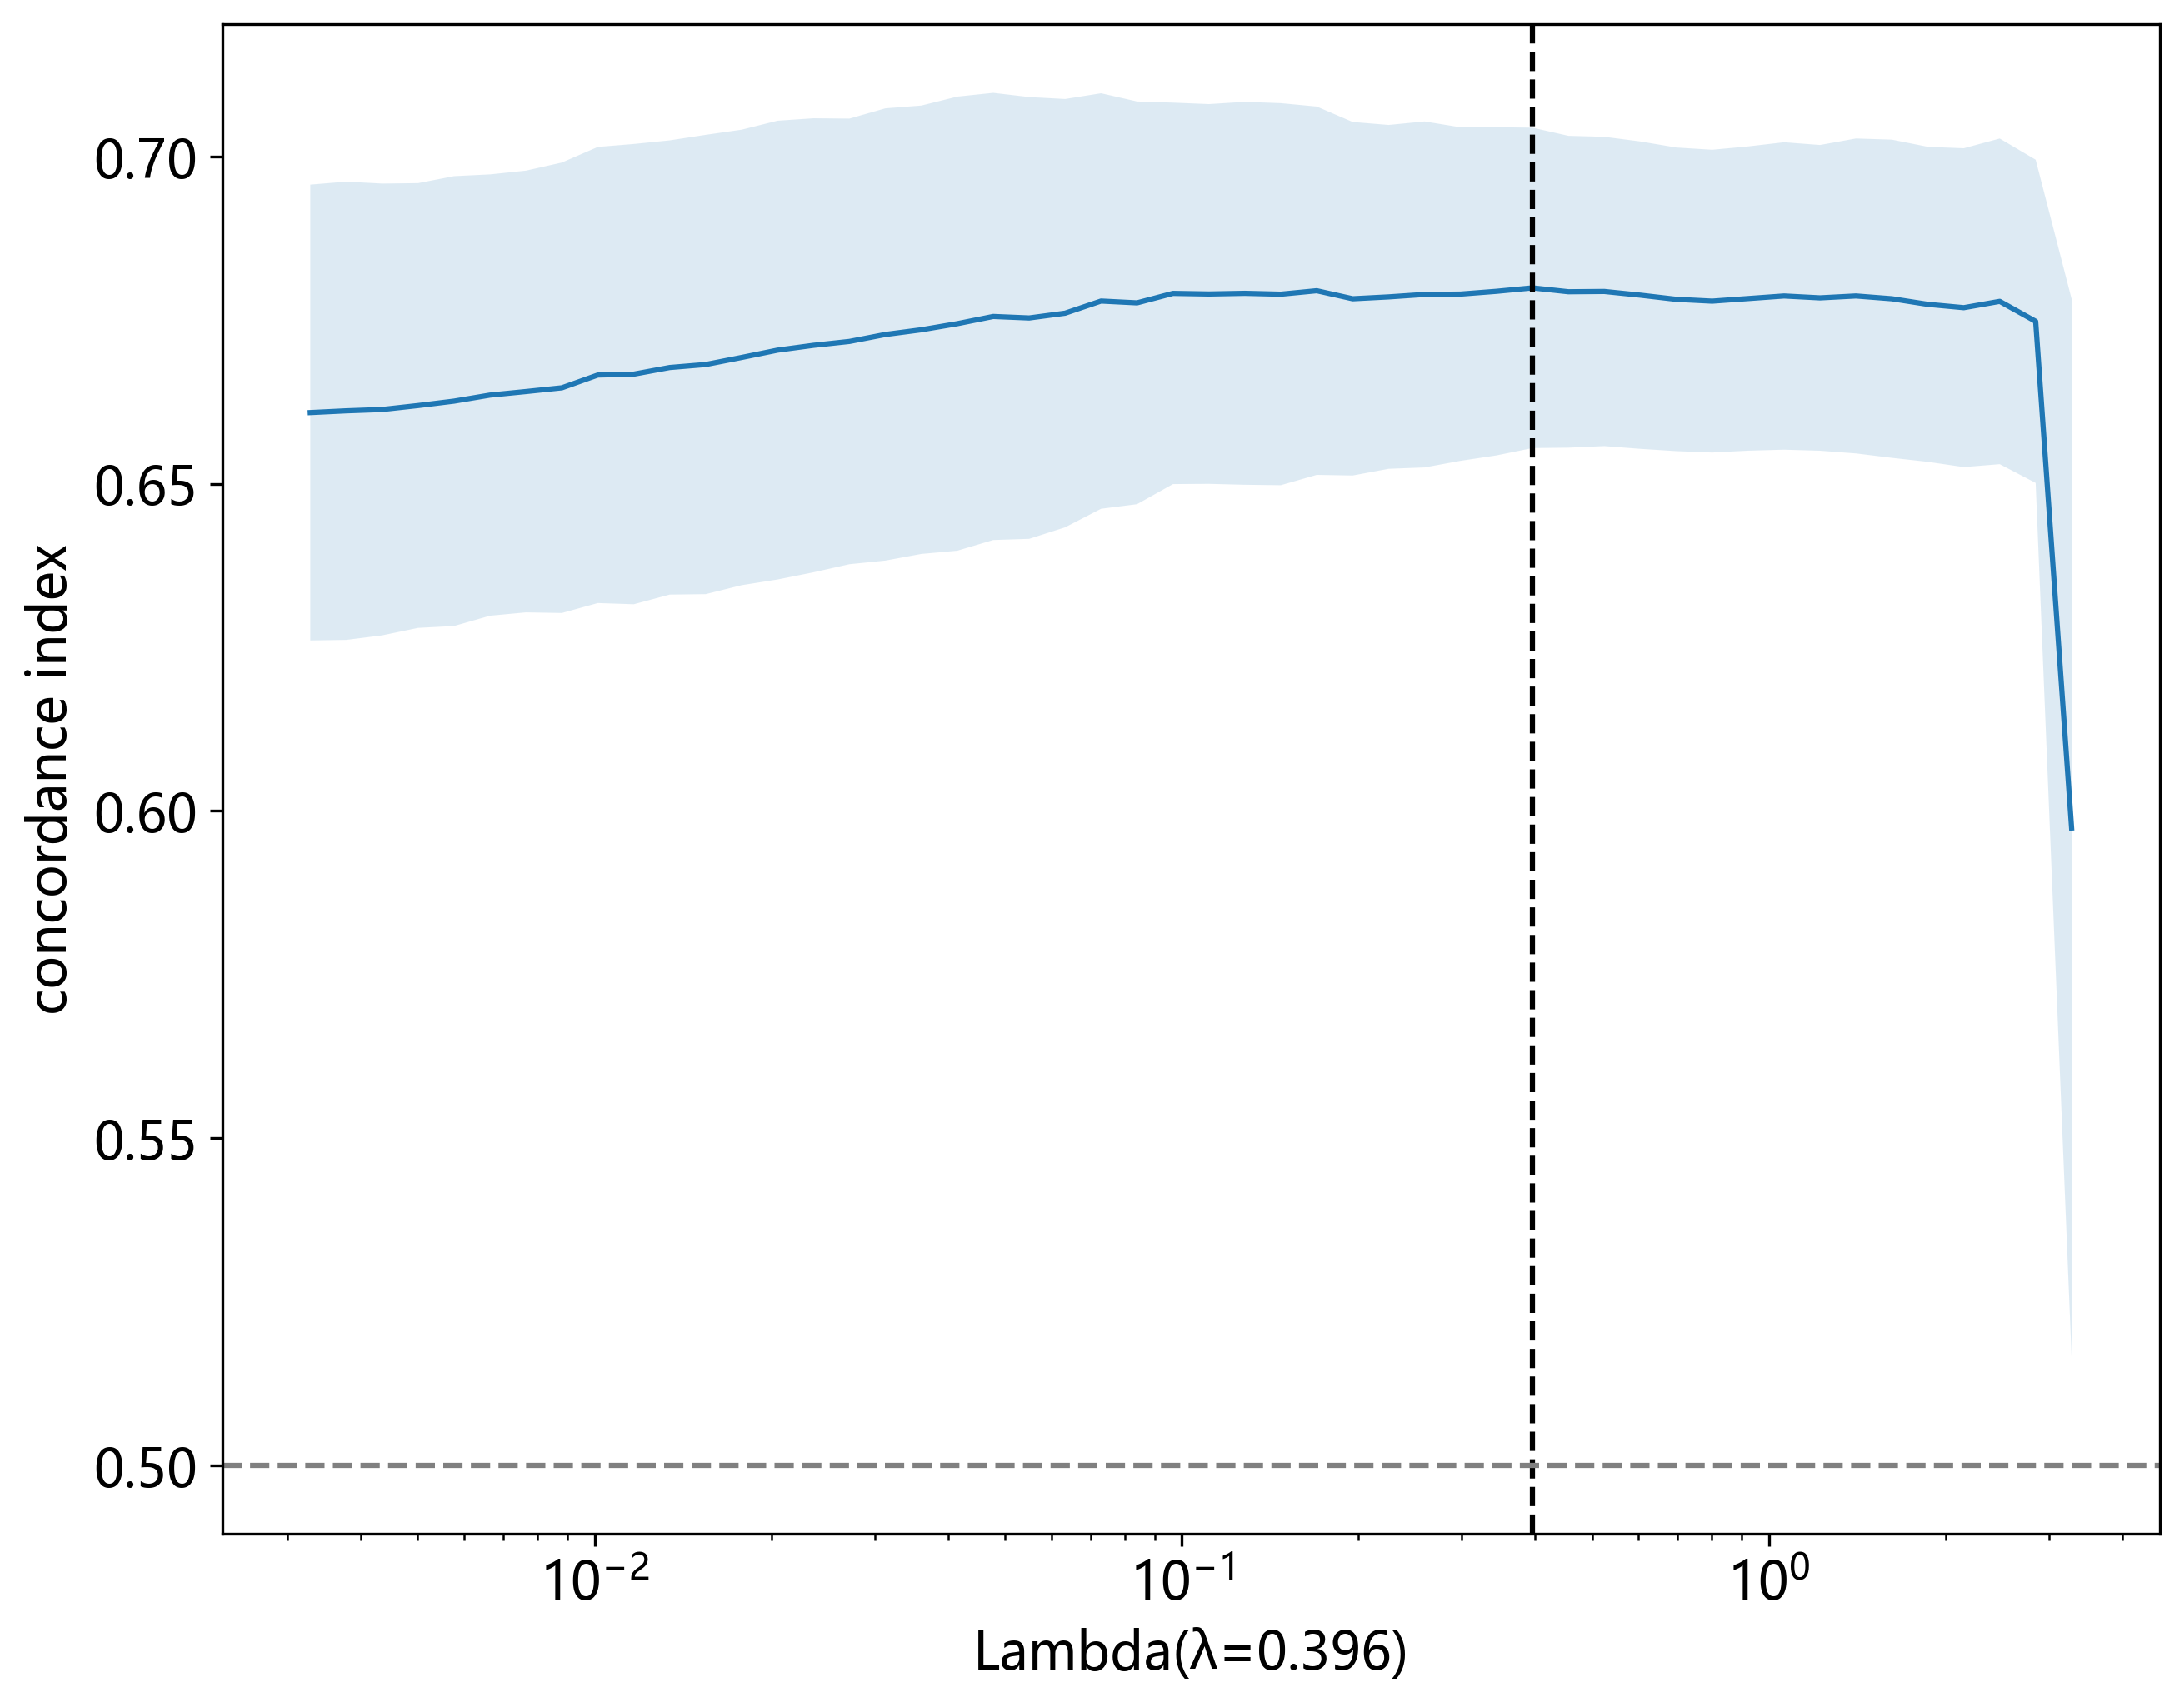

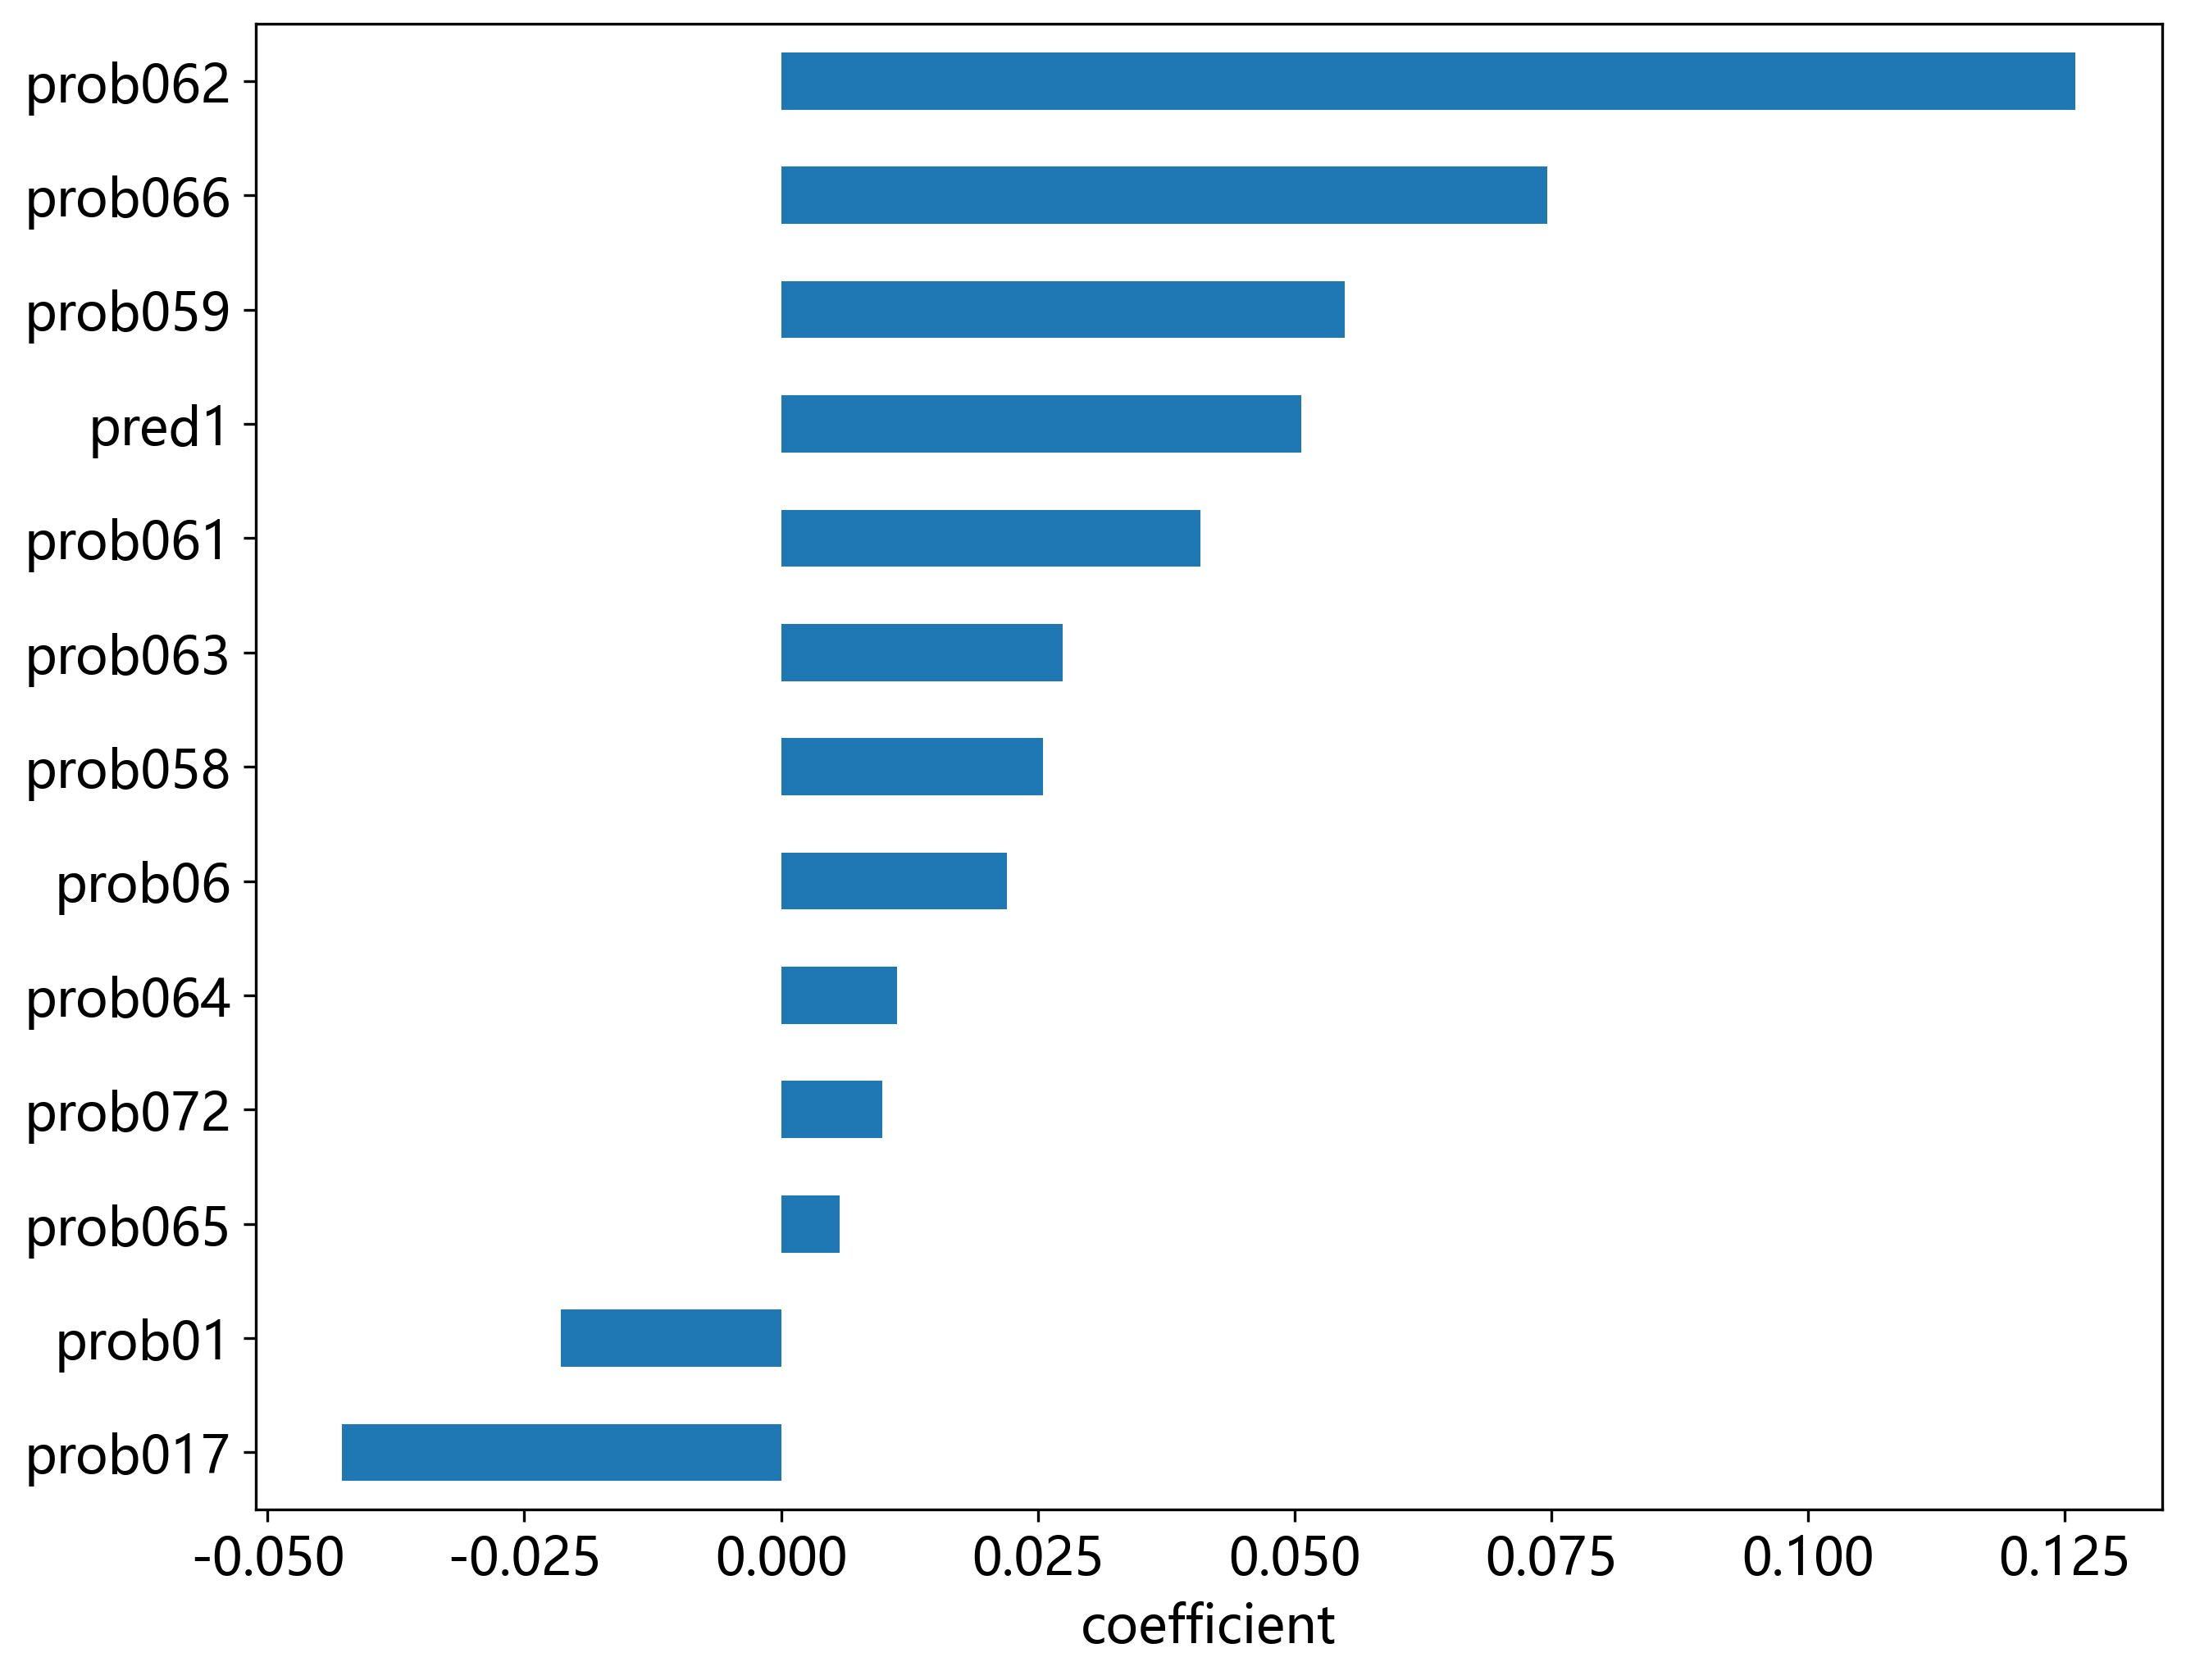

Survive = -0.042744 * prob017 -0.021446 * prob01 +0.005709 * prob065 +0.009819 * prob072 +0.011274 * prob064 +0.022026 * prob06 +0.025488 * prob058 +0.027450 * prob063 +0.040800 * prob061 +0.050680 * pred1 +0.054915 * prob059 +0.074641 * prob066 +0.126018 * prob062


In [337]:
from onekey_algo.custom.components.survival import get_x_y_survival, lasso_cox_cv
COEF_THRESHOLD = 1e-6

X, y = get_x_y_survival(train_data, val_outcome=1, event_col=event_col, duration_col=duration_col)
sel_features = lasso_cox_cv(X, y, max_iter=200,  norm_X=False, prefix=f"{task_type}", l1_ratio=0.1, cv=10, ppoints=50, alpha_logmin=-3)
# sel_features = lasso_cox_cv(X, y, max_iter=1000,  norm_X=False, prefix=f"{task}_", l1_ratio=0.8, cv=10)

In [338]:
# train_data = train_data[['ID'] + list(sel_features.index) + [event_col, duration_col]]
# for subset in subsets:
#     val_datasets[subset] = val_datasets[subset][['ID'] + list(sel_features.index) + [event_col, duration_col]]
#     val_datasets[subset].to_csv(f'features/{task_type}{subset}_cox.csv', index=False)

### 聚类分析

通过修改变量名，可以可视化不同相关系数下的相聚类分析矩阵。

注意：当特征特别多的时候（大于100），尽量不要可视化，否则运行时间会特别长。

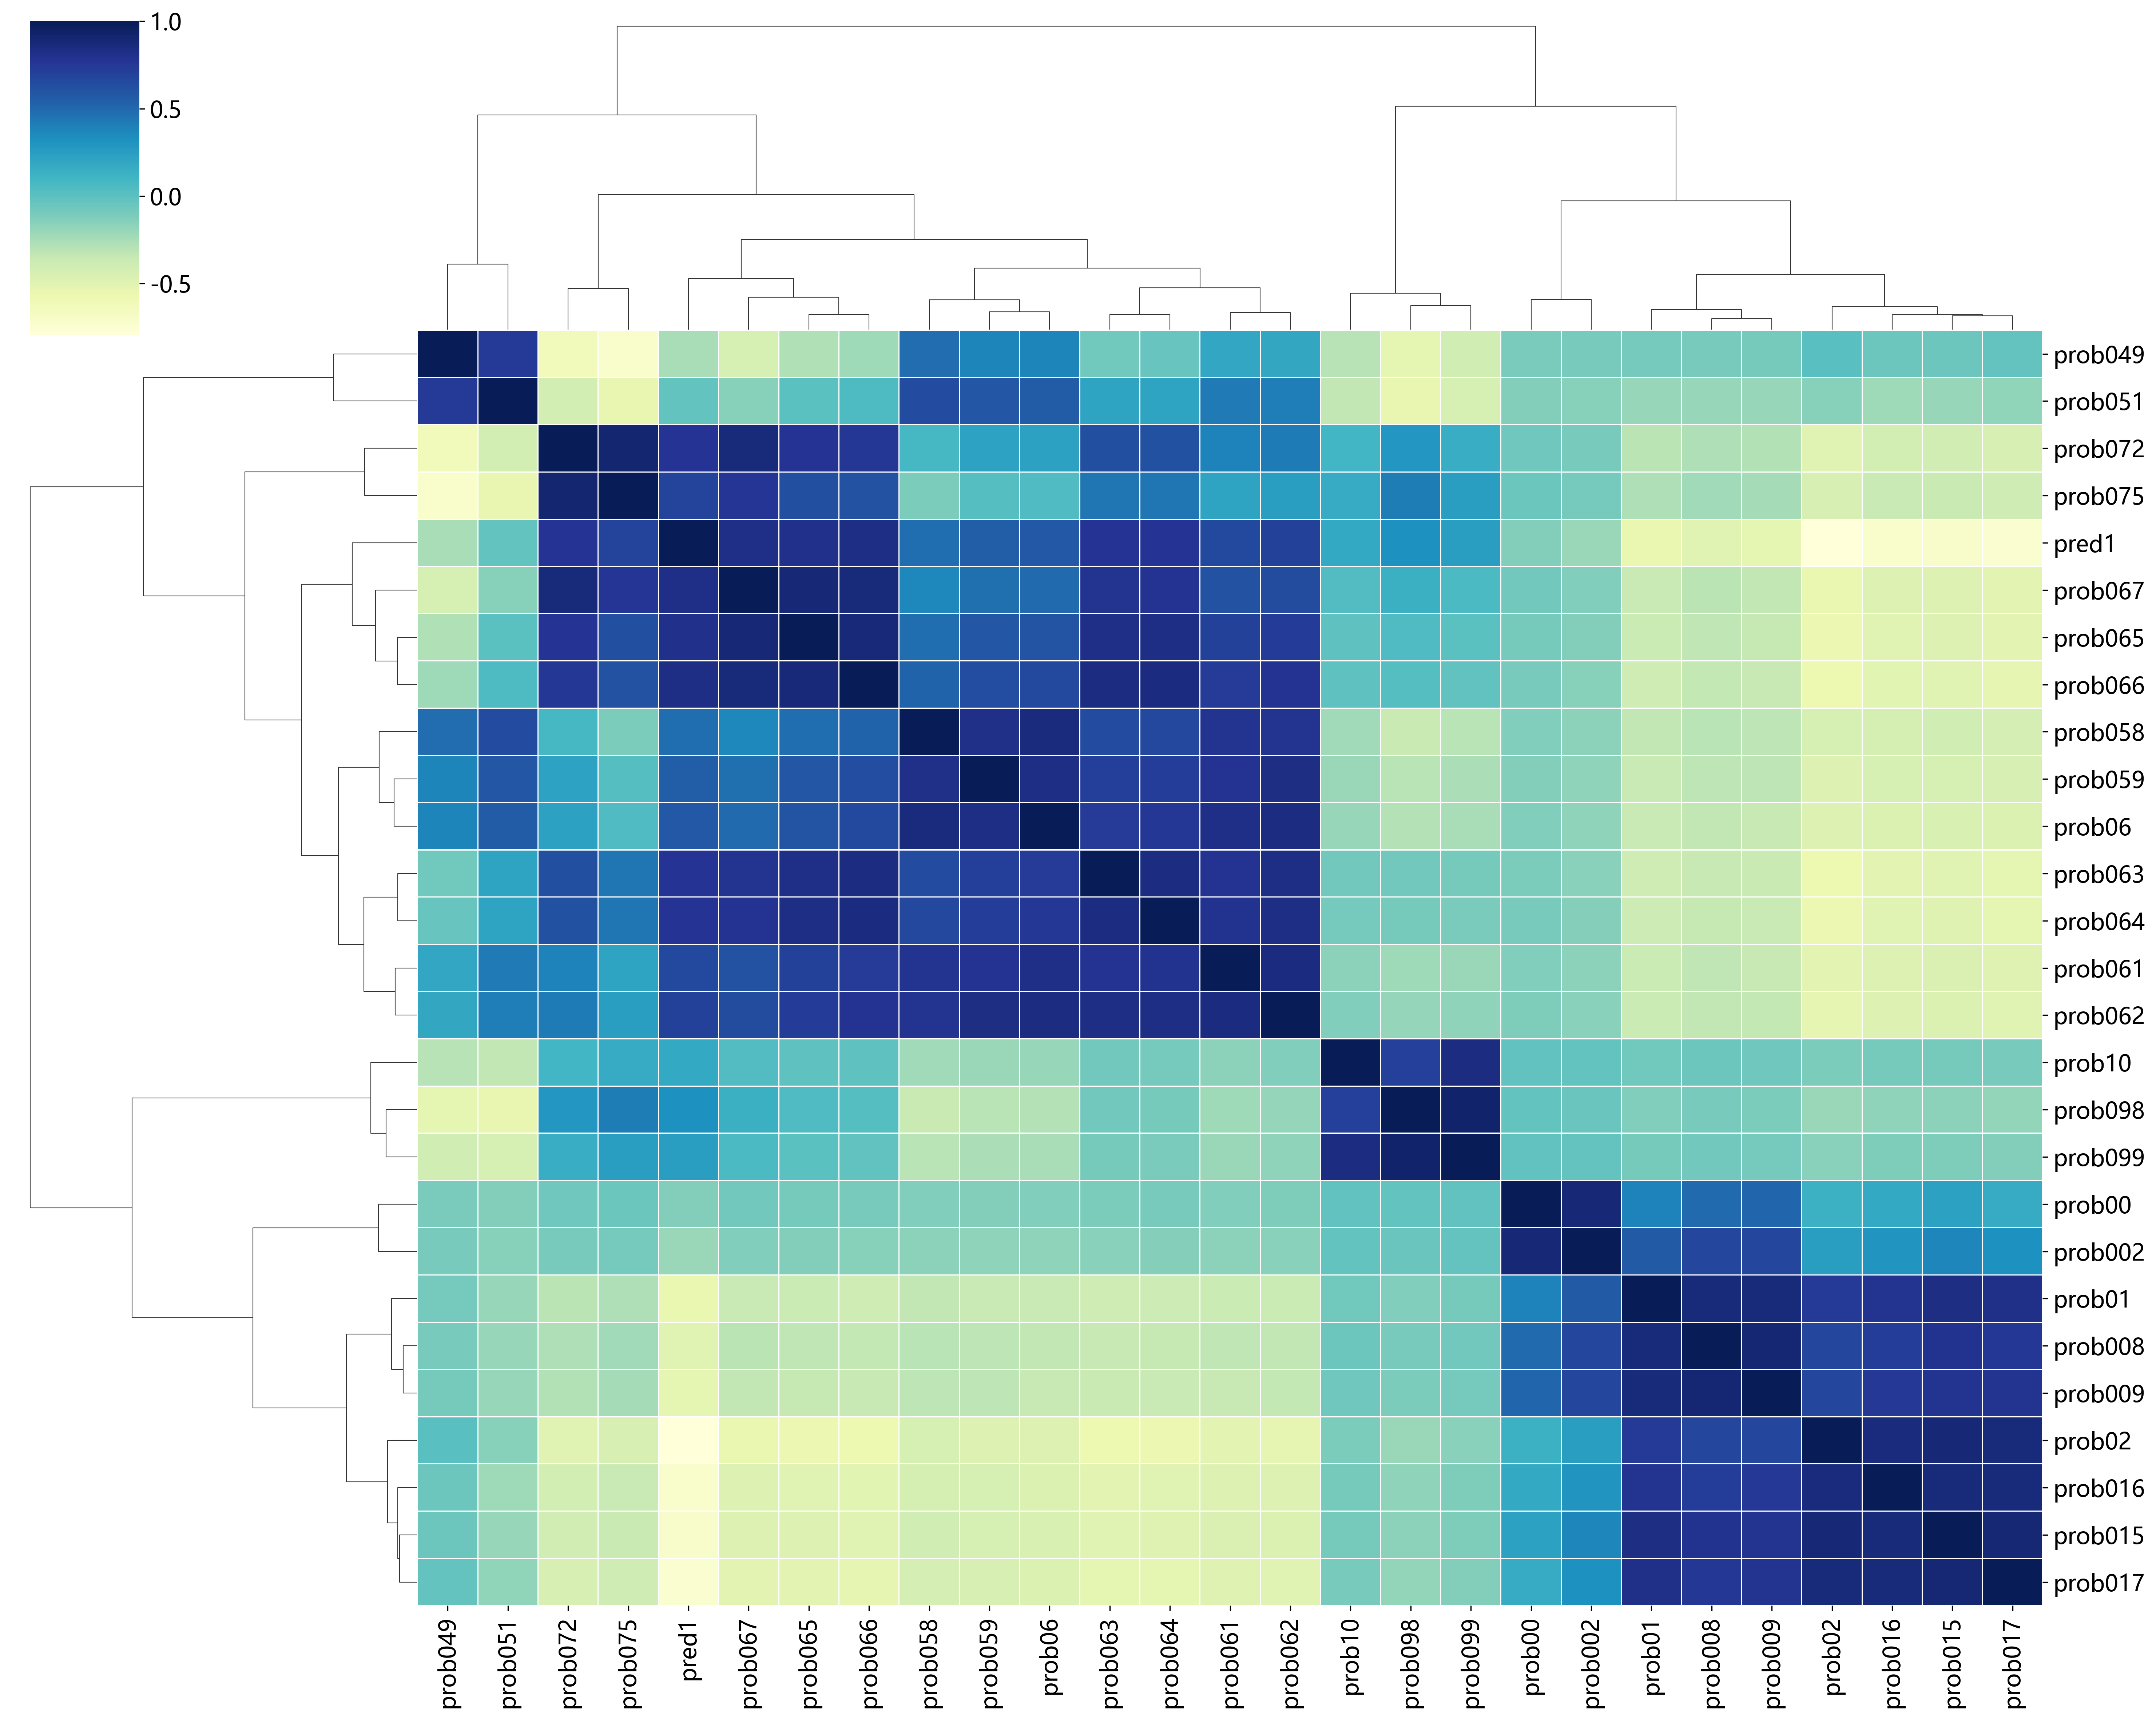

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

if train_data.shape[1] < 150:
    pp = sns.clustermap(train_data[[c for c in train_data.columns if c not in [event_col, duration_col, 'group']]].corr(corr_name), 
                        linewidths=.5, figsize=(20.0, 16.0), cmap='YlGnBu')
    plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
    plt.savefig(f'img/{task_type}feature_cluster.svg', bbox_inches = 'tight')

In [340]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.01)
cph.fit(train_data[[c for c in train_data.columns if c not in ['ID', 'group']]], duration_col=duration_col, event_col=event_col)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 585 total observations, 164 right-censored observations>
             duration col = 'OSTime'
                event col = 'OS'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 585
number of events observed = 421
   partial log-likelihood = -2313.92
         time fit was run = 2024-03-24 13:15:50 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
prob00     -0.02       0.98       0.12            -0.25             0.22                 0.78                 1.25
prob002     0.03       1.03       0.15            -0.27             0.33                 0.76                 1.39
prob008    -0.04       0.96       0.13            -0.29             0.21                 0.75                 1.23
prob009     0.03       1.03       0.14            -0.24             0.30                 0.78                 1.35
prob01     -0.15       0.86       0.12            -0.38             0.07                 0.68                 1.08
prob015     0.15       1.17       0.14            -0.12             0.43                 0.88                 1.54
prob016     0.17       1.18       0.13            -0.08             0.42                 0.92                 1.52
prob017    -0.25       0.78       0.13            -0.51             0.01                 0.60                 1.01
prob02      0.01       1.01       0.13            -0.24             0.26                 0.79                 1.30
prob049     0.02       1.02       0.12            -0.21             0.25                 0.81                 1.28
prob051    -0.04       0.96       0.10            -0.24             0.17                 0.79                 1.18
prob058     0.11       1.12       0.12            -0.13             0.35                 0.88                 1.42
prob059     0.09       1.09       0.10            -0.11             0.28                 0.90                 1.33
prob06      0.01       1.01       0.12            -0.22             0.24                 0.81                 1.28
prob061     0.04       1.04       0.11            -0.17             0.25                 0.85                 1.28
prob062     0.41       1.51       0.13             0.17             0.66                 1.18                 1.93
prob063    -0.05       0.95       0.12            -0.28             0.19                 0.75                 1.21
prob064    -0.08       0.92       0.12            -0.31             0.15                 0.73                 1.16
prob065    -0.04       0.96       0.13            -0.30             0.22                 0.74                 1.25
prob066     0.22       1.25       0.13            -0.03             0.47                 0.97                 1.59
prob067    -0.16       0.85       0.15            -0.45             0.13                 0.63                 1.14
prob072     0.17       1.18       0.17            -0.16             0.50                 0.85                 1.65
prob075    -0.05       0.95       0.19            -0.42             0.32                 0.66                 1.38
prob098     0.34       1.41       0.23            -0.10             0.79                 0.90                 2.19
prob099    -0.15       0.86       0.23            -0.61             0.31                 0.54                 1.37
prob10      0.07       1.07       0.12            -0.16             0.30                 0.85                 1.35
pred1      -0.07       0.93       0.22            -0.51             0.37                 0.60                 1.45

            cmp to     z      p   -log2(p)
covariate                                 
prob00        0.00 -0.14   0.89       0.17
prob002       0.00  0.19   0.85       0.23
prob008       0.00 -0.29   0.77       0.38
prob009       0.00  0.21   

In [341]:
print(cph.concordance_index_)
su = cph.summary[['exp(coef)', 'exp(coef) lower 95%', 'exp(coef) upper 95%', 'p']]
su.columns = ['HR', 'HR lower 95%', 'HR upper 95%', 'pvalue']
su.reset_index().to_csv(f'features/{task_type}_features_HR.csv', index=False)
su

0.6917880823750447


,HR,HR lower 95%,HR upper 95%,pvalue
covariate,,,,
prob00,0.983,0.776,1.246,0.890
prob002,1.029,0.762,1.390,0.852
prob008,0.964,0.752,1.235,0.770
prob009,1.030,0.785,1.351,0.832
prob01,0.856,0.681,1.077,0.185
prob015,1.167,0.884,1.541,0.277
prob016,1.184,0.924,1.516,0.182
prob017,0.777,0.598,1.008,0.057
prob02,1.010,0.788,1.296,0.935


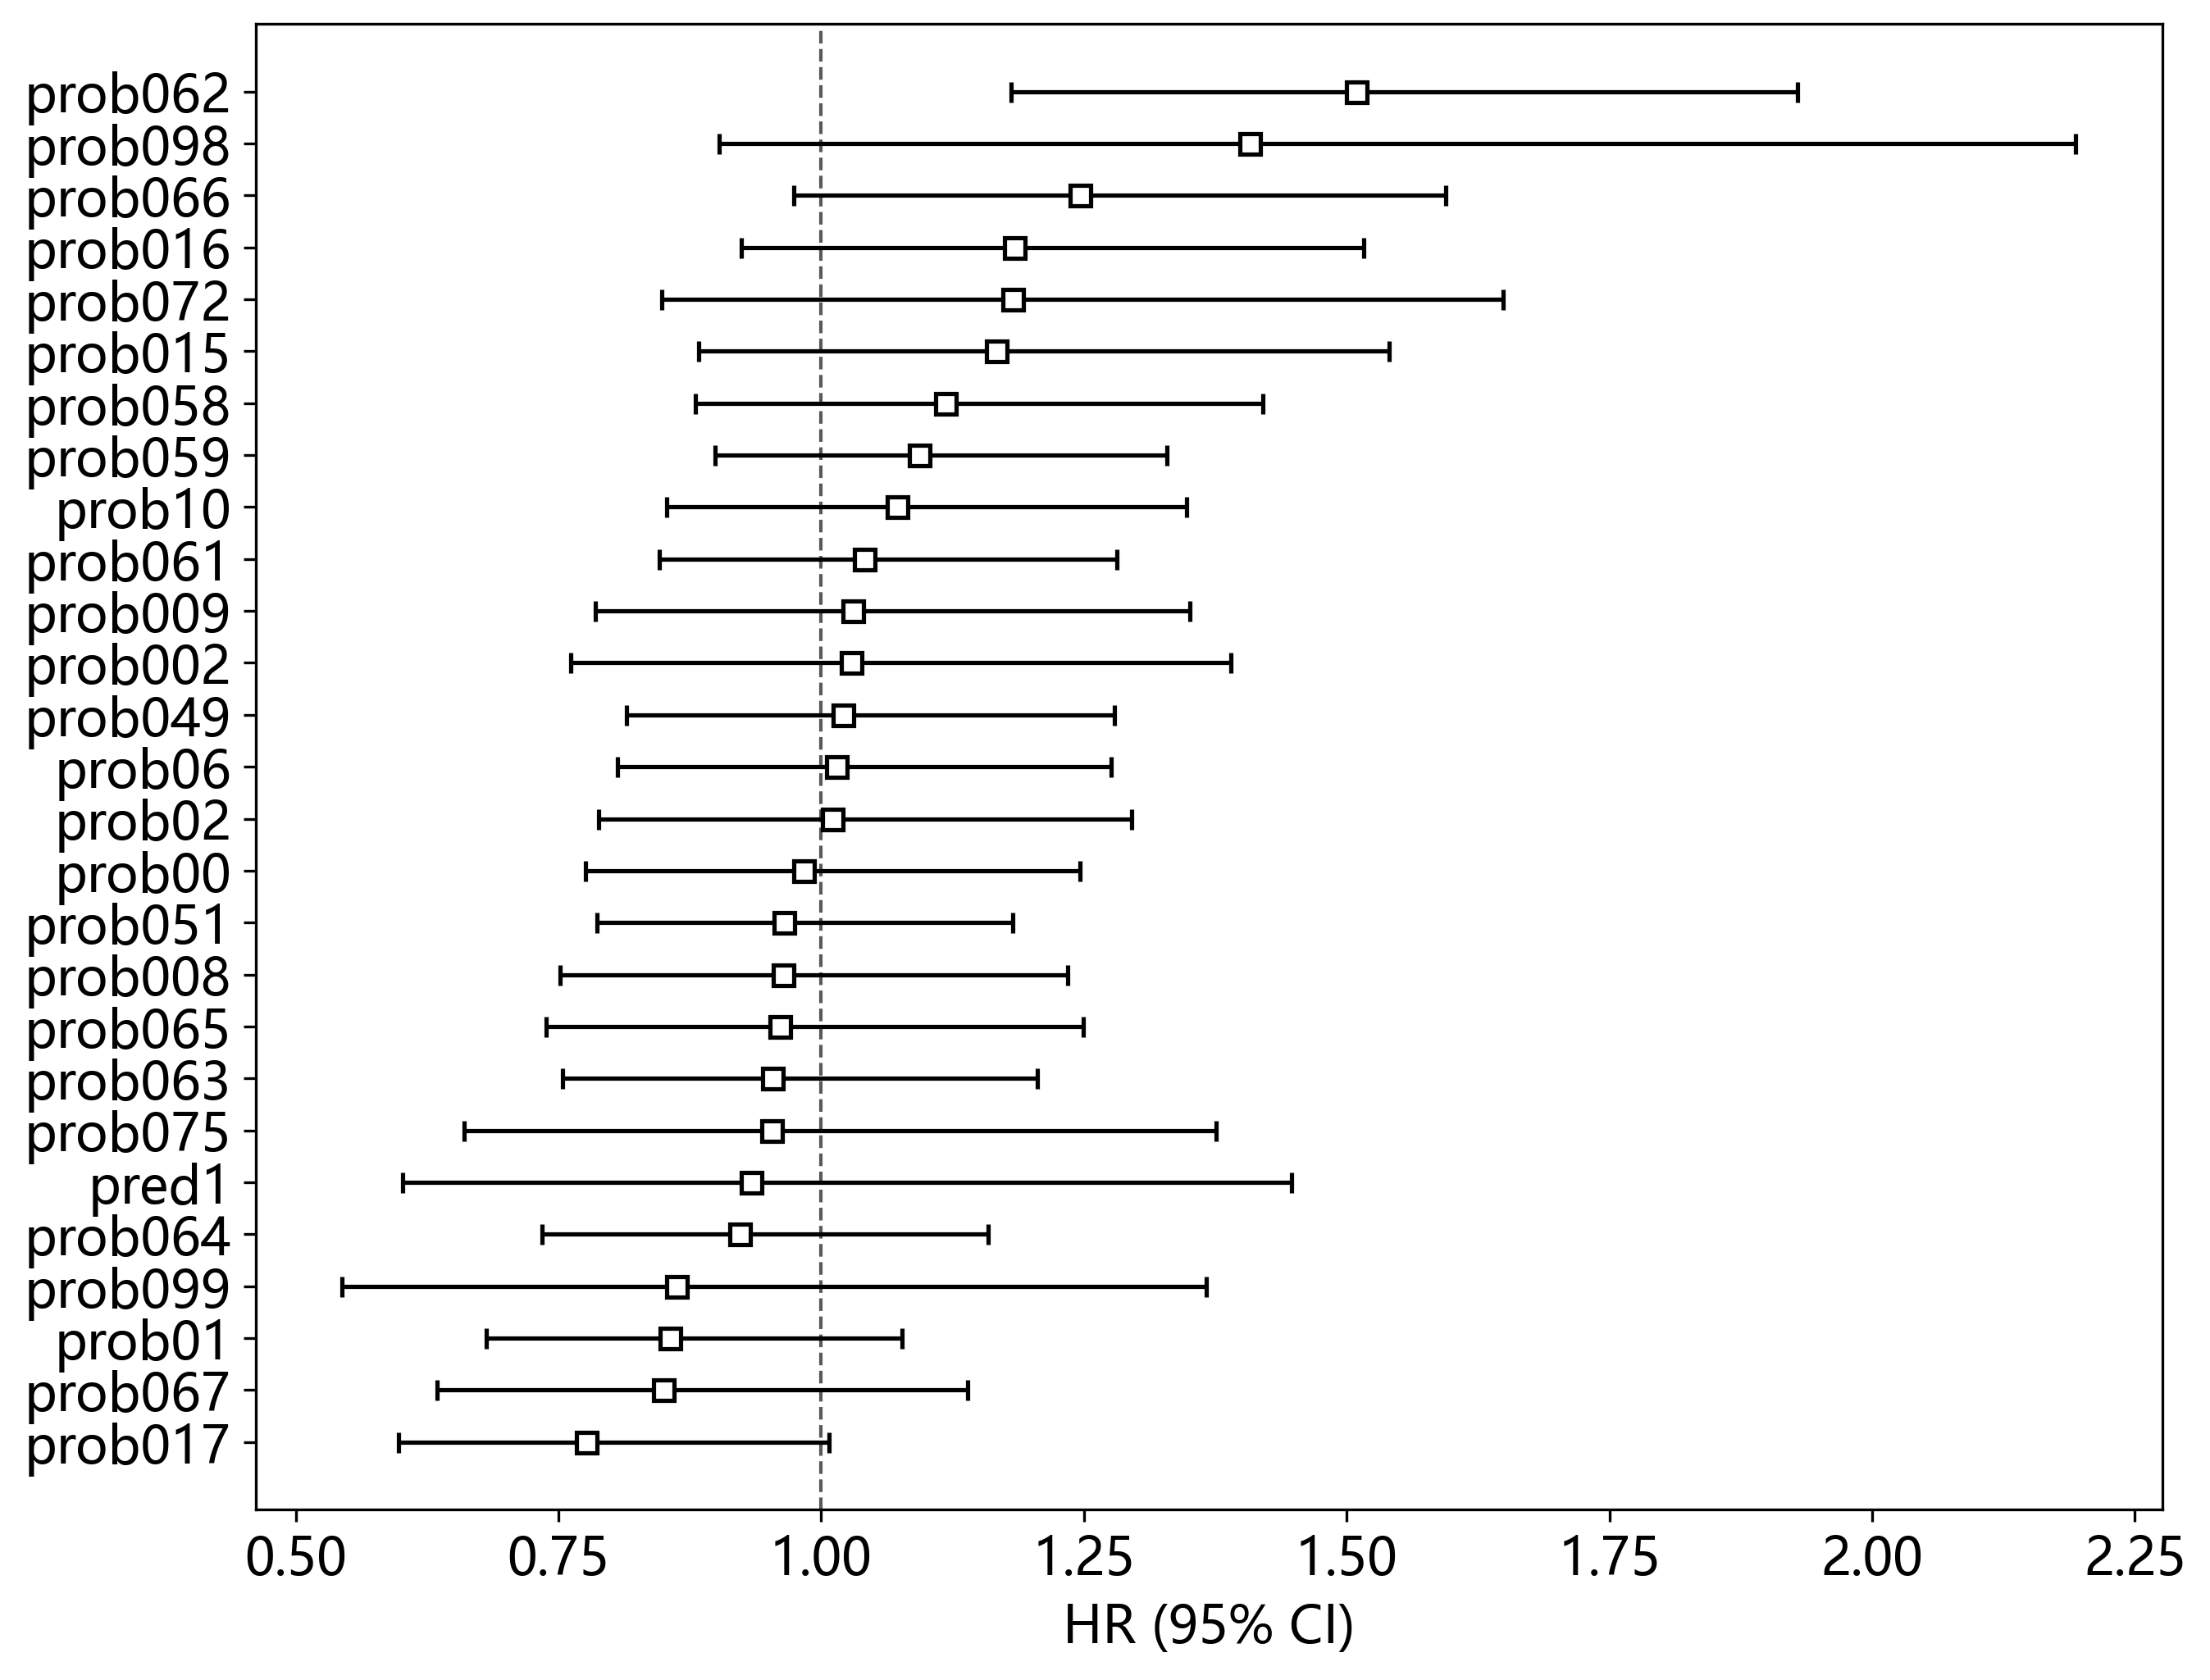

In [342]:
import matplotlib.pyplot as plt

cph.plot(hazard_ratios=True)
plt.savefig(f'img/{task_type}feature_pvalue.svg')
plt.show()

In [343]:
from onekey_algo.custom.components.ugly import drop_survival

def get_sel(cox_data, cph, drop_num):
    kid = drop_survival(cox_data, cph, drop_num=drop_num, is_drop_ids=False)
    print(set(cox_data['ID']) - set(kid['ID']))
    cox_data = pd.merge(cox_data, kid[['ID']], on='ID', how='inner')
    return cox_data
for dn, subset in [(95, 'train'), (0, 'test')]:
    val_datasets[subset] = get_sel(val_datasets[subset][[c for c in val_datasets[subset].columns if c not in ['group']]], cph, dn)

{'2005255', '1716348', '1824737', '1652041', '1847370', '1802088', '1619052', '1834221', '1807980', '2007287', '1838338', '1637550', '2012096', '1810191', '1553654', '1807770', '1908370', '1711466', '1734715', '1721301', '1703213', '1906716', '1839591', '1921138', '1611413', '1847110', '1652865', '1837642', '1933422', '1805286', '2014454', '1805651', '2003732', '1700432', '1750924', '1836364', '1927342', '1720062', '2005587', '1914111', '2011895', '1819236', '1916142', '1904508', '1844691', '1746143', '1632399', '1538405', '1746923', '1838563', '1838082', '1849665', '1650687', '1925122', '1912020', '1803175', '1810192', '1715714', '1827717', '1736091', '1820223', '1531527', '1745706', '1711443', '1831970', '2008194', '1913179', '1745041', '1829043', '1742852', '1732969', '1701850', '2017021', '1812774', '1629294', '2004775', '1810423', '1748149', '2005103', '1929141', '1731806', '1807134', '1909393', '1803928', '1529159', '1332330', '1750291', '1853876', '1703779', '1846866', '1642588'

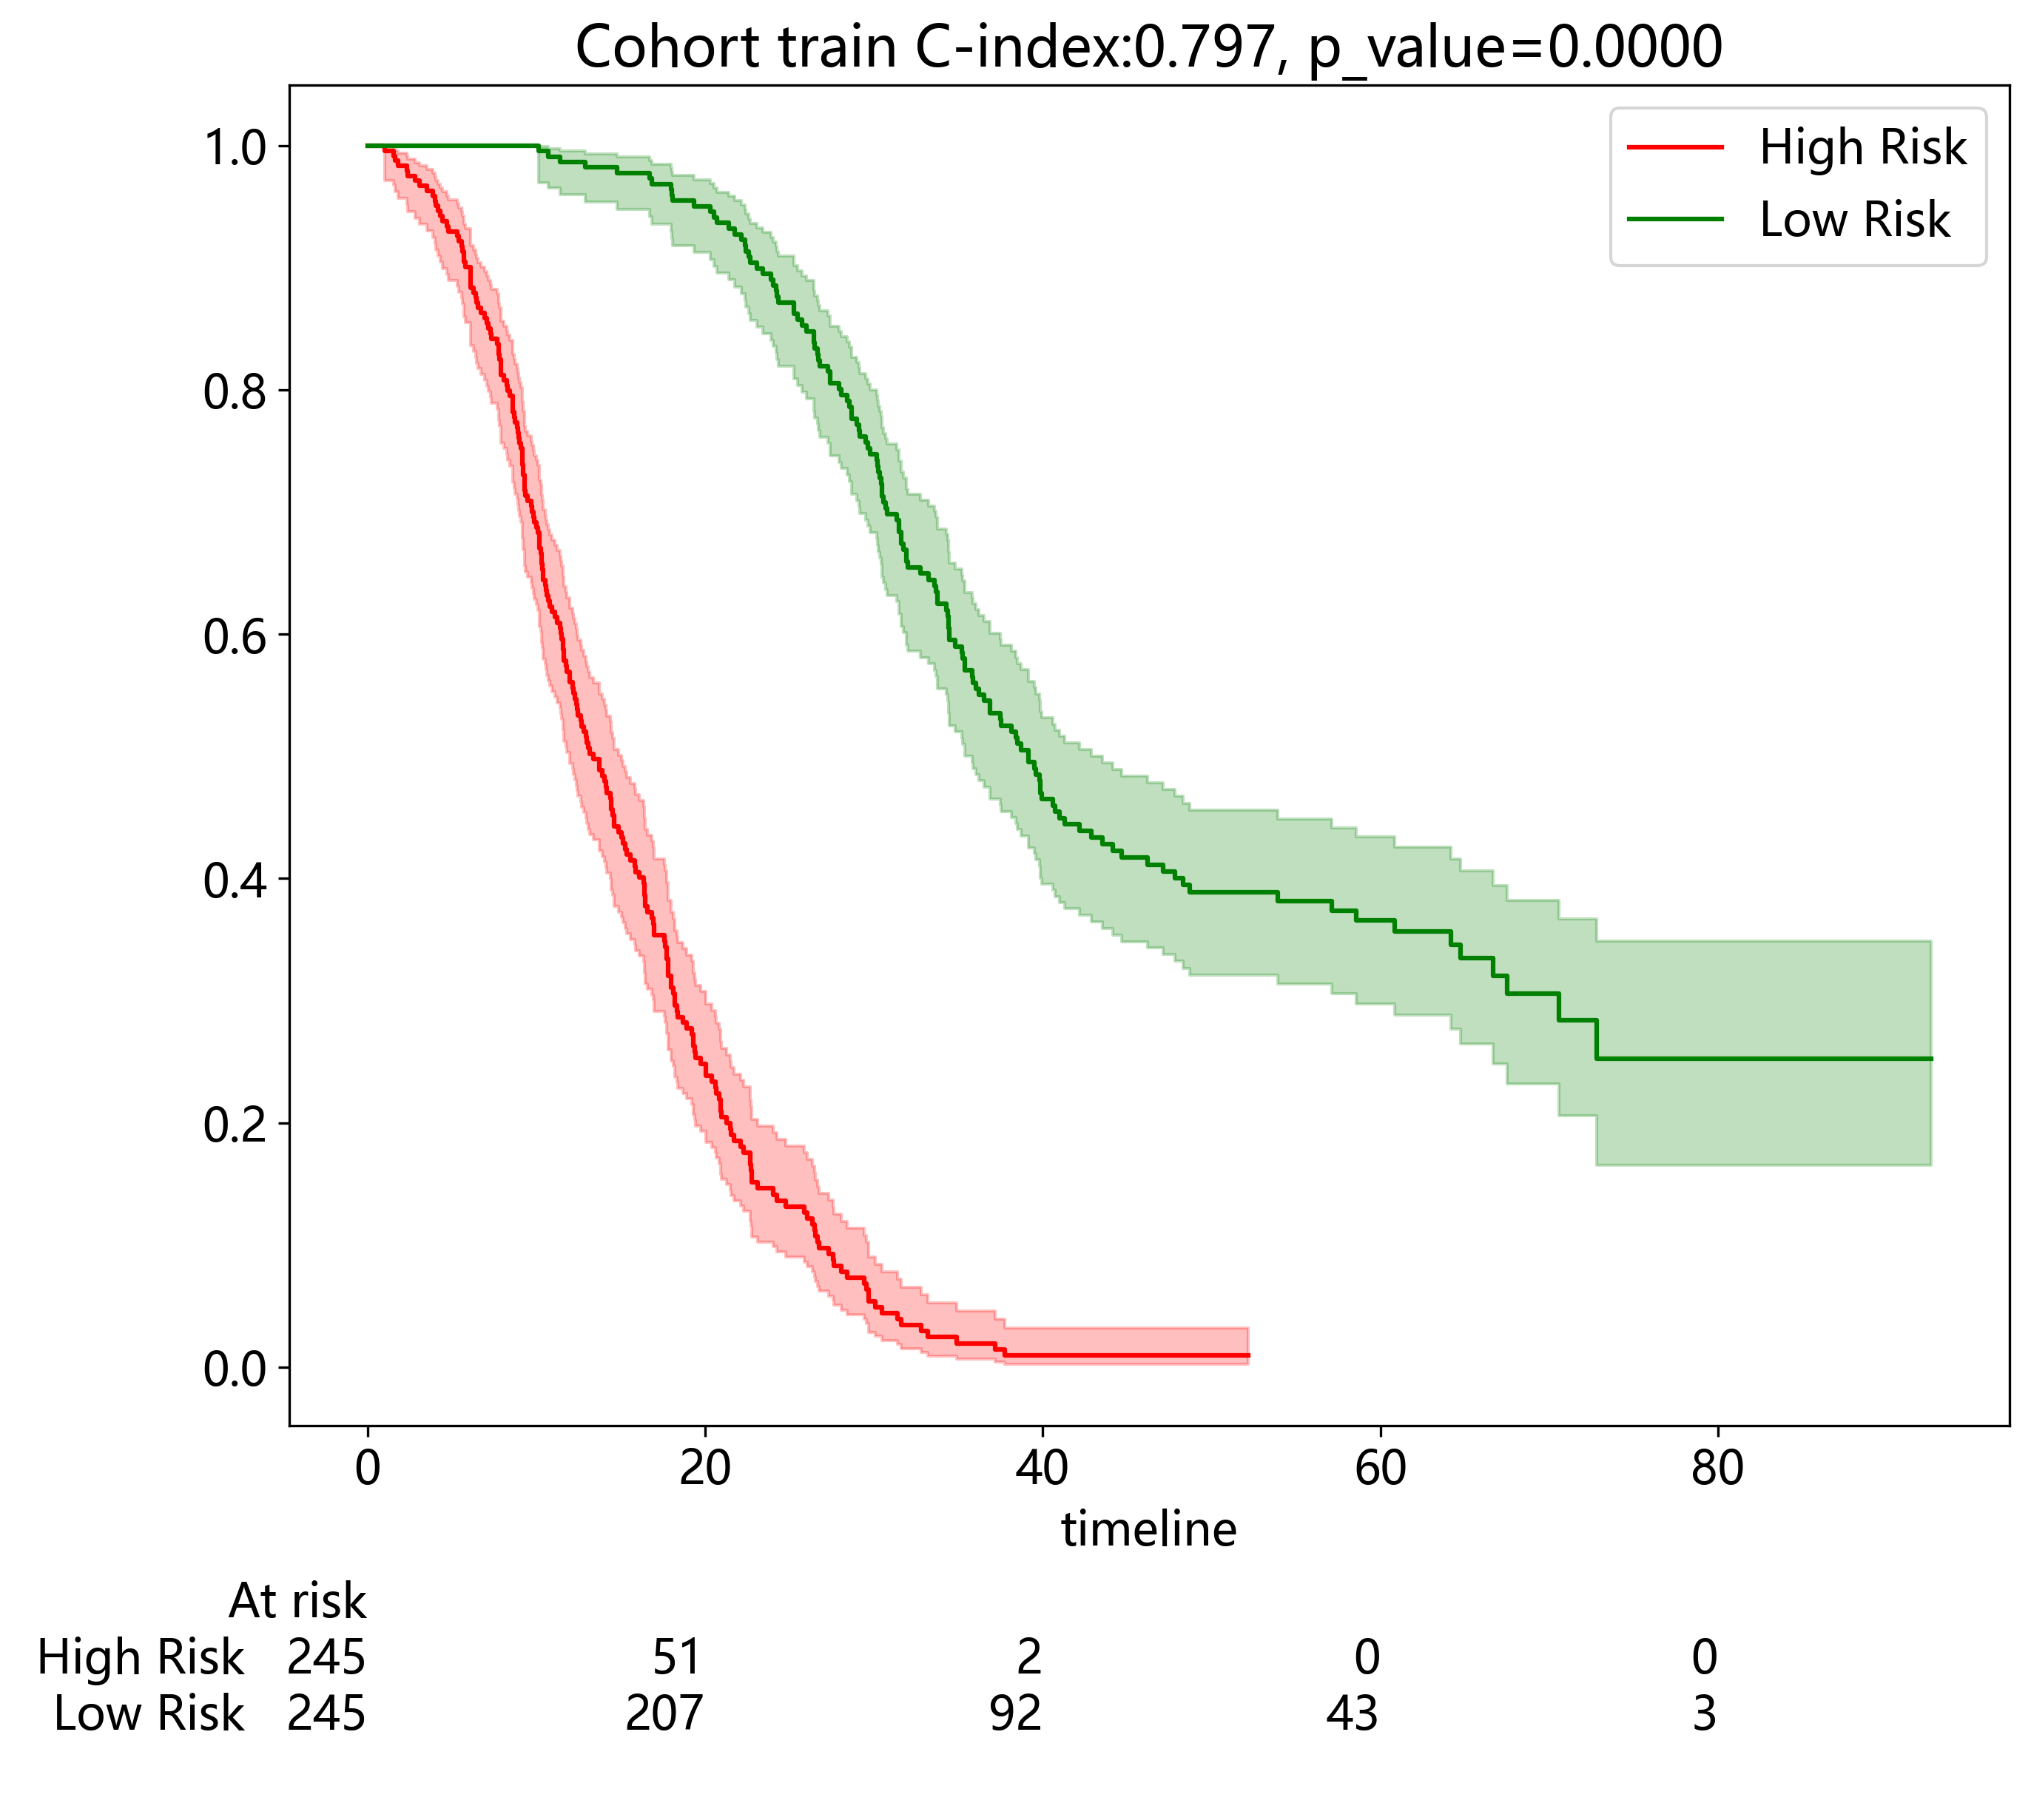

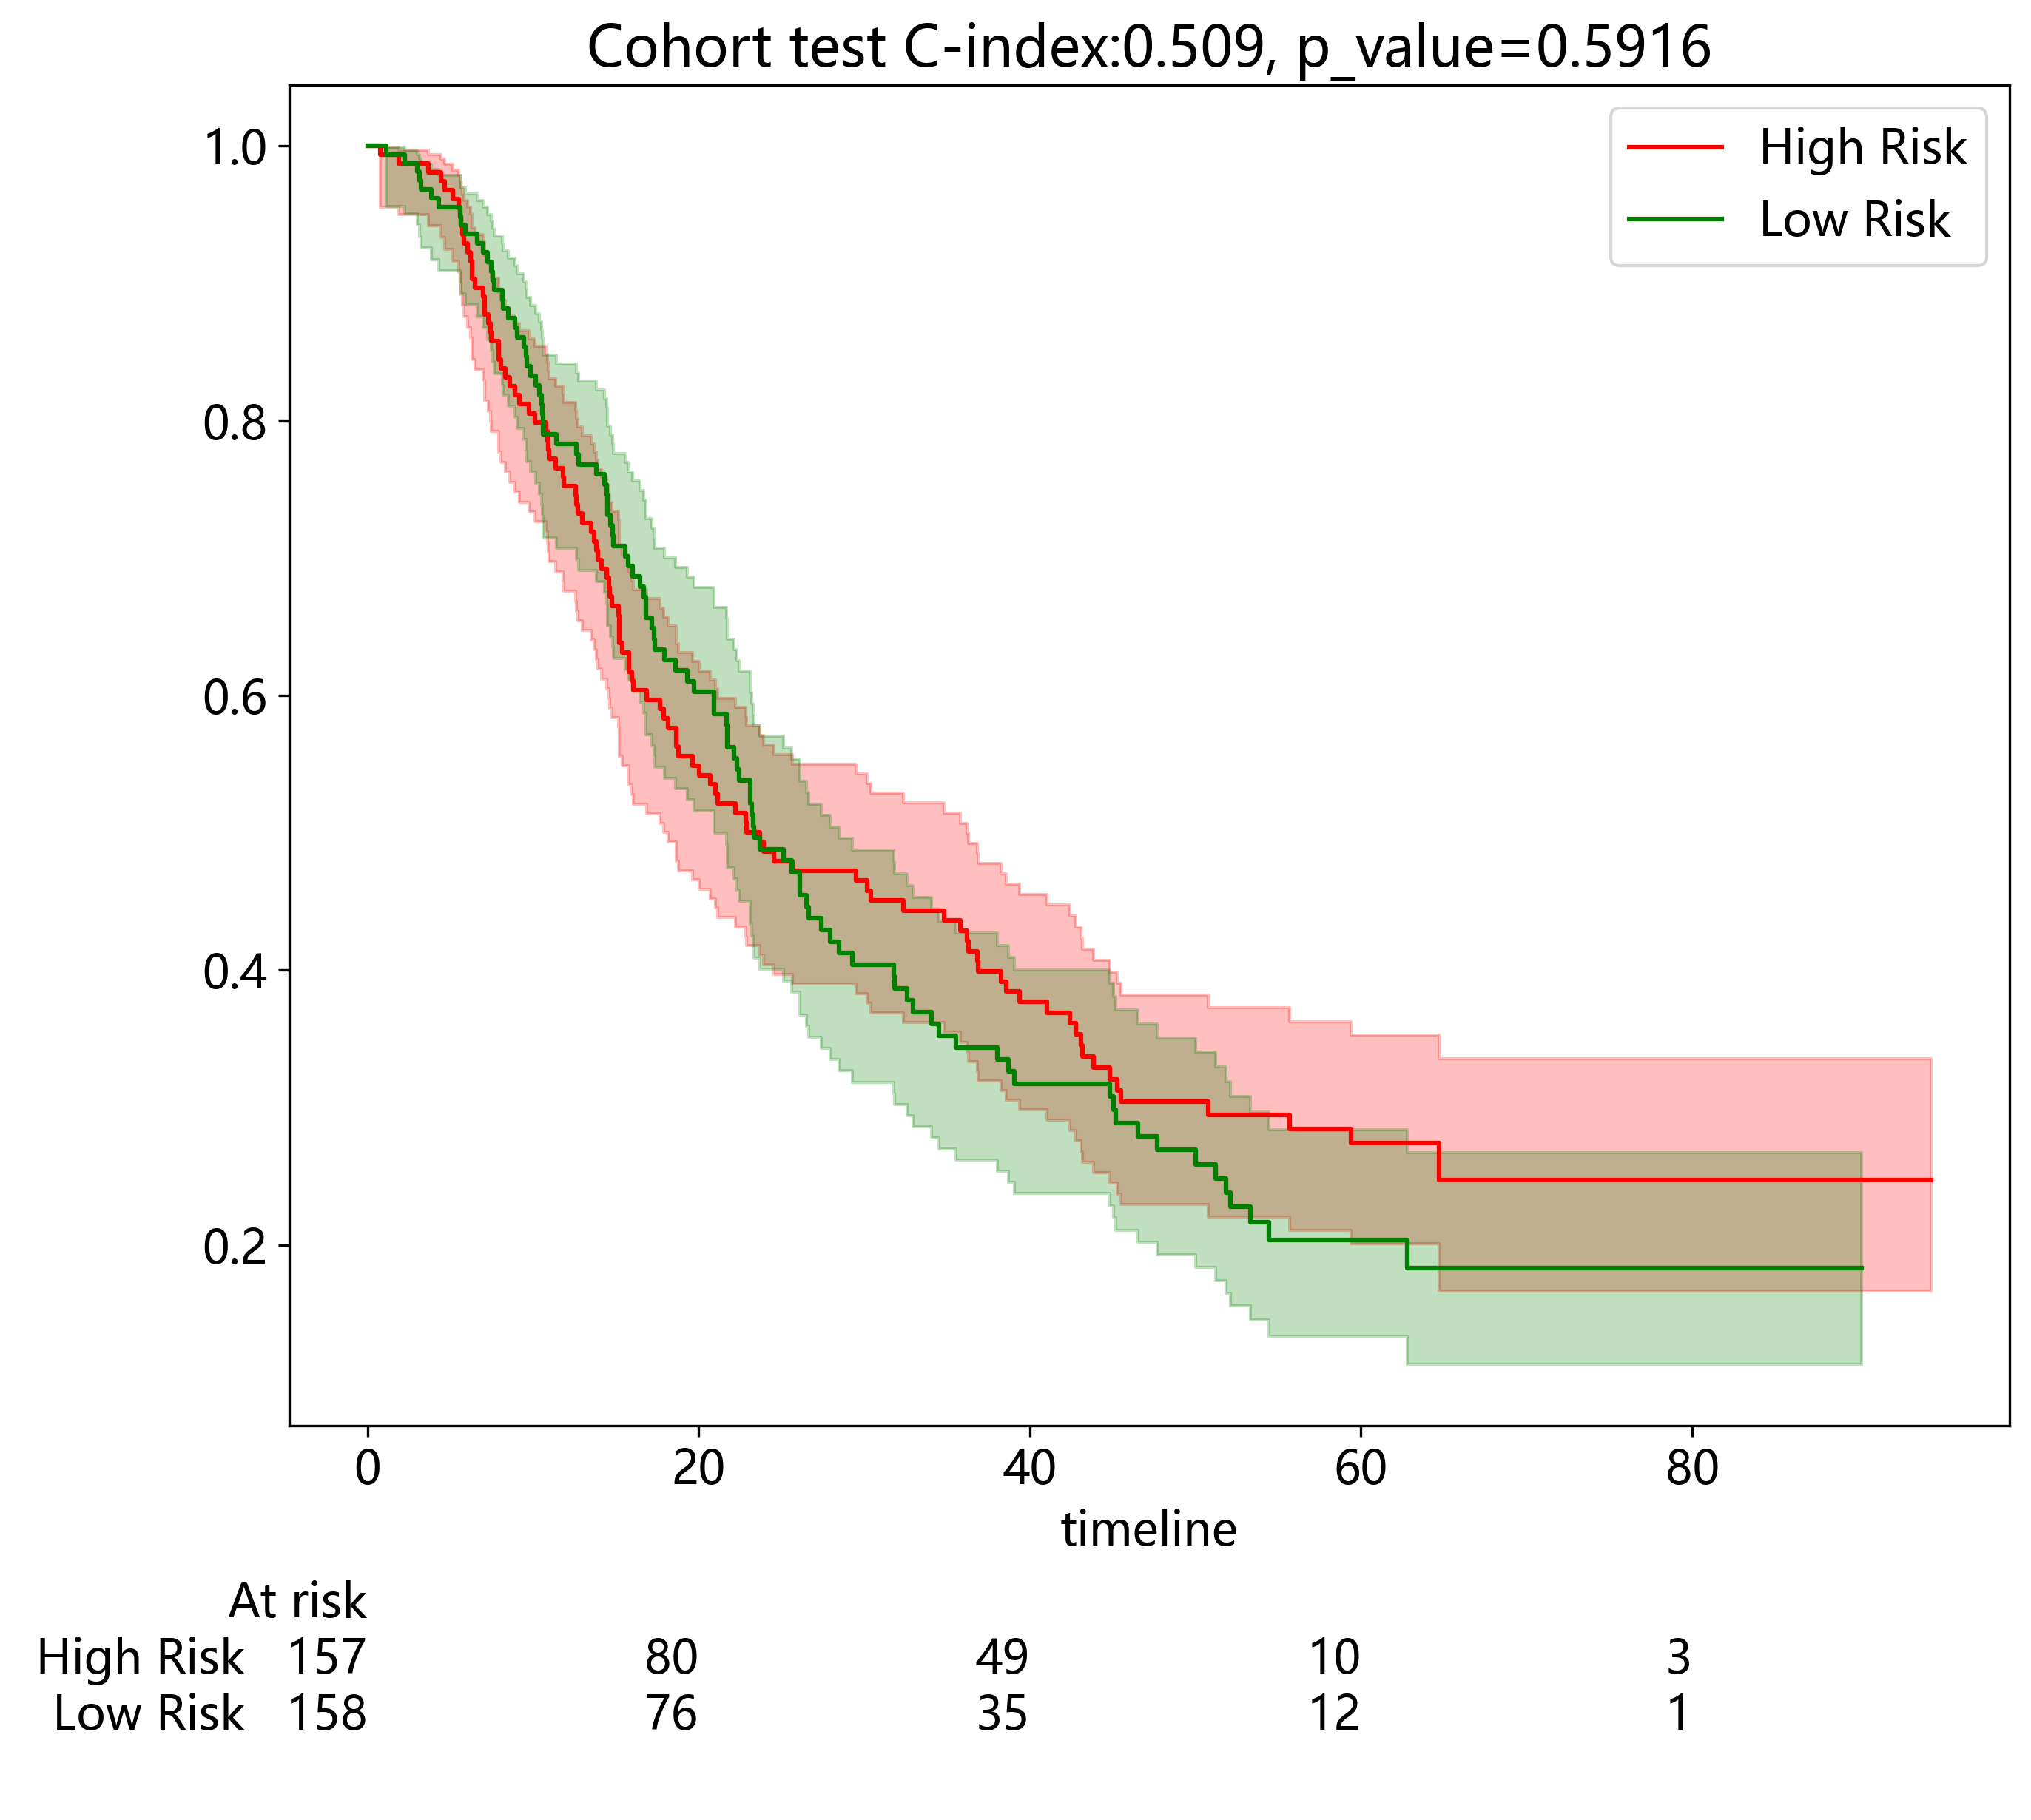

In [344]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

for subset, test_data in val_datasets.items():
    if subset == 'test_ex':
        continue
    c_index = cph.score(test_data[[c for c in test_data.columns if c not in ['ID', 'group']]], scoring_method="concordance_index")
#     y_pred = cph.predict_median(test_data[[c for c in test_data.columns if c != 'ID']])
#     cox_data = pd.concat([test_data, y_pred], axis=1)
#     mean = cox_data.describe()[0.5]['mean']
#     cox_data['HR'] = cox_data[0.5] < mean
    y_pred = cph.predict_partial_hazard(test_data[[c for c in test_data.columns if c != 'ID']])
    cox_data = pd.concat([test_data, y_pred], axis=1)
    mean = cox_data.describe()[0]['50%']
    cox_data['HR'] = cox_data[0] > mean
#     cox_data['HR'] = cox_data[0] > 1

    dem = (cox_data["HR"] == True)
    results = logrank_test(cox_data[duration_col][dem], cox_data[duration_col][~dem], 
                           event_observed_A=cox_data[event_col][dem], event_observed_B=cox_data[event_col][~dem])
    p_value = results.p_value
    plt.title(f"Cohort {subset} C-index:{c_index:.3f}, p_value={p_value:.4f}")
    if sum(dem):
        kmf_high = KaplanMeierFitter()
        kmf_high.fit(cox_data[duration_col][dem], event_observed=cox_data[event_col][dem], label="High Risk")
        kmf_high.plot_survival_function(color='r')
    if sum(~dem):
        kmf_low = KaplanMeierFitter()
        kmf_low.fit(cox_data[duration_col][~dem], event_observed=cox_data[event_col][~dem], label="Low Risk")
        kmf_low.plot_survival_function(color='g')
    add_at_risk_counts(kmf_high, kmf_low, rows_to_show=['At risk'])
    plt.savefig(f'img/{task_type}KM_{subset}.svg', bbox_inches='tight')
    plt.show()

In [345]:
import os
import numpy as np

def get_prediction(model: CoxPHFitter, data, ID=None, **kwargs):
    hr = model.predict_partial_hazard(data)
    expectation = model.predict_expectation(data)
    
    predictions = pd.concat([hr, expectation], axis=1)
    predictions.columns = ['HR', 'expectation']
    if ID is not None:
        predictions = pd.concat([ID, hr, expectation], axis=1)
        predictions.columns = ['ID', 'HR', 'expectation']
    else:
        predictions = pd.concat([hr, expectation], axis=1)
        predictions.columns = ['HR', 'expectation']
    return predictions
os.makedirs('results', exist_ok=True)
kids = []
for subset, test_data in val_datasets.items():
    results = get_prediction(cph, test_data, ID=test_data['ID'])
    results.to_csv(f'results/{task_type}cox_predictions_{subset}.csv', index=False)
    results['group'] = subset
    kids.append(results[['ID', 'group']])

In [351]:
pd.concat(kids, axis=0).to_csv('data/path_ids.csv', index=False)

In [289]:
val_datasets.keys()

odict_keys(['train', 'test', 'trainsel', 'testsel'])

In [279]:
val_datasets['trainsel']

,ID,prob00,prob002,prob008,prob009,prob01,prob015,prob016,prob017,prob02,...,prob066,prob067,prob072,prob075,prob098,prob099,prob10,pred1,OS,OSTime
0,1238060,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,0.907,2.526,2.723,3.405,-0.071,-0.078,-0.152,1.232,0,4.50
1,1240023,-0.082,-0.148,0.808,0.513,0.778,1.909,1.458,1.504,2.038,...,-1.632,-1.529,-1.141,-0.927,-0.287,-0.214,-0.152,-2.395,0,28.47
2,1322885,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,3.015,2.172,2.488,2.194,0.346,-0.015,-0.152,1.231,0,4.87
3,1325512,-0.082,0.896,4.284,4.672,7.191,3.873,4.902,3.145,2.650,...,-0.347,-0.474,-0.173,0.083,-0.287,-0.214,-0.152,-0.857,1,53.93
4,1411121,-0.082,-0.148,-0.417,-0.190,-0.490,-0.512,-0.224,-0.598,-0.504,...,-1.409,-0.674,-0.953,-0.815,-0.287,-0.214,-0.152,-0.654,0,24.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2016335,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,1.759,1.832,2.533,2.376,1.416,0.829,0.165,1.232,0,10.40
521,2016764,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,2.118,3.519,3.189,2.442,-0.056,-0.142,-0.152,1.231,0,13.30
522,2017217,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,0.078,0.641,1.933,1.936,3.552,2.810,1.580,1.233,0,10.77
523,2018527,-0.082,-0.148,-0.417,-0.447,-0.490,-0.685,-0.676,-0.741,-0.857,...,1.687,2.498,1.187,1.989,0.306,-0.121,0.131,1.209,0,5.07


In [174]:
g = pd.read_csv('data/label-RND-0.csv', dtype={'ID': str})[['ID', 'group']]

In [177]:
len(set(val_datasets['testsel']['ID']) & set(g['ID']))

174

In [309]:
pd.concat(kids, axis=0)

,ID,group
0,1238060,train
1,1240023,train
2,1322885,train
3,1325512,train
4,1411121,train
...,...,...
220,2014259,test
221,2014261,test
222,2017020,test
223,2017433,test
